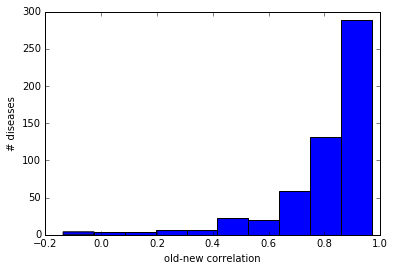

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
oldembed = pd.read_table('all20_component.csv',sep=",",index_col=0)
newembed = pd.read_table('disease_embeddings_longer_run.txt',sep=",",index_col=0)
oldembed.index = oldembed.index.str.replace("-","_")
newmatch = newembed.loc[oldembed.index,:]
W = np.linalg.inv(oldembed.transpose().dot(oldembed)).dot(oldembed.transpose()).dot(newmatch)
from scipy import stats 
otrans = oldembed.dot(W)
pr = otrans.apply(lambda x: stats.pearsonr(x, newmatch.loc[x.name,:])[0], axis=1)
plt.hist(pr)
plt.xlabel('old-new correlation')
plt.ylabel('# diseases')